In [1]:
from IPython.display import HTML
file_path = 'svdFirst.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)


The true rank of image is: 512.
Image dimensions: 512x512
Dimensions of U: (512, 512)
Dimensions of Sigma: (512,)
Dimensions of V^T: (512, 512)
Difference (Frobenius norm): 2.426340581710773e-10


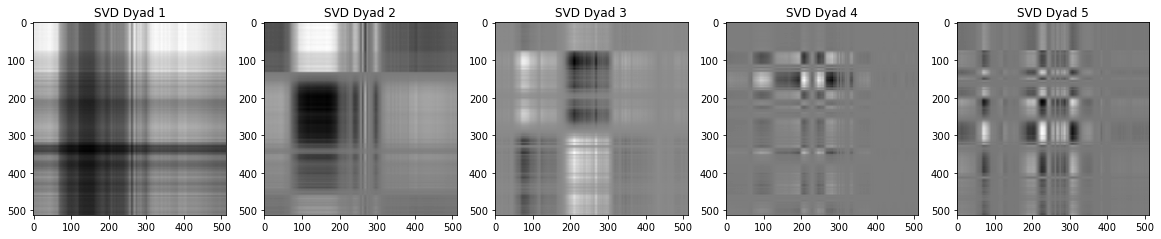

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from scipy.linalg import svd

# Load the image into memory and compute its SVD;

image = data.camera()
m,n = image.shape
print(f"The true rank of image is: {np.linalg.matrix_rank(image)}.")


U, S, VT = np.linalg.svd(image, full_matrices=True)
print(f"Image dimensions: {m}x{n}")
print(f"Dimensions of U: {U.shape}")
print(f"Dimensions of Sigma: {S.shape}") 
print(f"Dimensions of V^T: {VT.shape}")

reconstructed_image = (U @ np.diag(S)) @ VT
diff = np.linalg.norm(image - reconstructed_image)
print(f"Difference (Frobenius norm): {diff}")

#Each dyad represents how a single singular component (σi) contributes to the approximation of the original image. 
# Dyads obtained from singular components with larger values tend to have a greater impact on the overall shape of the image.

plt.figure(figsize=(20, 10)) 

for i in range(5):
    dyad = np.outer(U[:, i] * S[i], VT[i, :])
    plt.subplot(1, 5, i+1)
    plt.imshow(dyad, cmap='gray')
    plt.title(f'SVD Dyad {i+1}')
    
plt.show()


• Plot the singular values of X. Do you note something?

First singular value: 63868.99960191935 (Captures the most significant data pattern)
Second singular value: 14491.089714437125 (Represents the second most significant data pattern)
One hundred and first singular value: 267.13779646304965 (Much smaller, indicating less significant data patterns)
One hundred and first singular value: 0.2414182617783167 (Much smaller, indicating less significant data patterns)


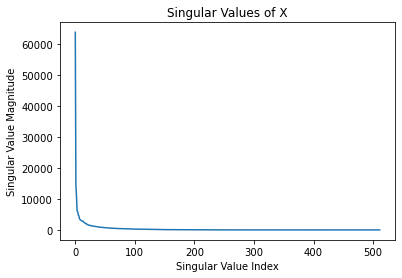

In [5]:
plt.figure()
plt.plot(S)
plt.title("Singular Values of X")
plt.xlabel("Singular Value Index")
plt.ylabel("Singular Value Magnitude")

# The first few singular values are significantly larger than the rest and they These large singular values capture 
# the most important information in the data and represent the dominant modes or structures in the image.
# There is a point in the plot where the singular values drop off very rapidly,  
# indicating that the corresponding singular vectors can be truncated without losing much information. 

print(f"First singular value: {S[0]} (Captures the most significant data pattern)")
print(f"Second singular value: {S[1]} (Represents the second most significant data pattern)")
print(f"One hundred and first singular value: {S[100]} (Much smaller, indicating less significant data patterns)")
print(f"One hundred and first singular value: {S[500]} (Much smaller, indicating less significant data patterns)")




• Visualize the k-rank approximation of X for different values of k. What do you observe?

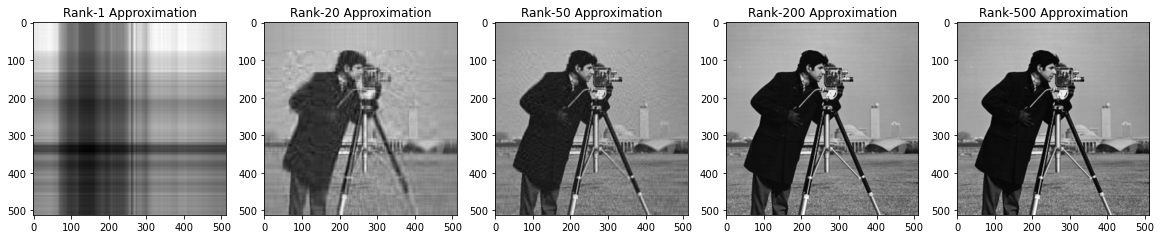

In [13]:
#Choosing an appropriate value of k depends on your specific application and the trade-off between image quality and compression.
# Higher values of k provide higher image fidelity but require more storage space and computational resources, while lower values of k lead to more aggressive compression but lower image quality.

k_values = [1, 20, 50, 200,500]
plt.figure(figsize=(20, 20))

for k in k_values:
    image_k = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
    plt.subplot(1, len(k_values), k_values.index(k) + 1)
    plt.imshow(image_k, cmap='gray')
    plt.title(f'Rank-{k} Approximation')

Compute and plot the approximation error ||X − Xk||F for increasing values of k, where Xk is the
k-rank approximation of k.

Text(0, 0.5, 'Approximation Error (Frobenius Norm)')

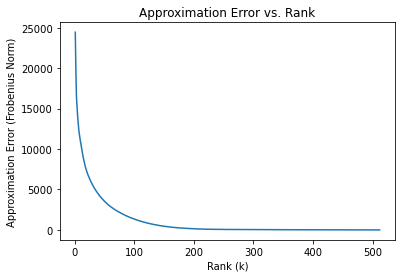

In [14]:
error_values = []
for k in range(1, len(S) + 1):
    image_k = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
    error = np.linalg.norm(image - image_k, 'fro')  
    error_values.append(error)

 # "elbow point", it indicates that increasing k beyond this point provides diminishing returns in terms of reducing the error.
 #  trade-off between approximation quality and computational resources.

plt.figure()
plt.plot(range(1, len(S) + 1), error_values)
plt.title("Approximation Error vs. Rank")
plt.xlabel("Rank (k)")
plt.ylabel("Approximation Error (Frobenius Norm)")

Plot the compression factor ck = 1 - k(m+n+1) / mn for increasing k. What is the approximation error when <br>
the compressed image requires the same amount of informations of those of the uncompressed image
(i.e. ck = 1)?

Text(0, 0.5, 'Compression Factor (c_k)')

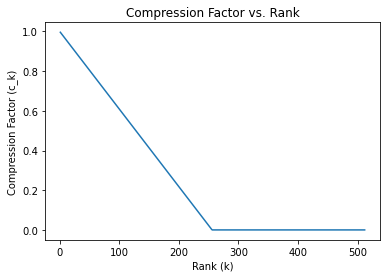

In [23]:
m, n = image.shape
compression_factors = [1 - ((k * (m + n + 1)) / (m * n)) for k in range(1, len(S) + 1)]
compression_factors = [0 if i < 0 else i for i in compression_factors]


plt.figure()
plt.plot(range(1, len(S) + 1), compression_factors)
plt.title("Compression Factor vs. Rank")
plt.xlabel("Rank (k)")
plt.ylabel("Compression Factor (c_k)")


In [50]:
# #the approximation error calculated is very close to zero, 
# # then this indicates that the image_k approximation is practically identical to the original image

m, n = image.shape
k = 1

compression_factor = 1
while compression_factor > 0 and k<= min(m,n):
    compressed_image = (U[:, :k] @ np.diag(S[:k])) @ VT[:k, :]
    compression_factor = 1 - ((k * (m + n + 1)) / (m * n))
    k += 1

approximation_error = np.linalg.norm(image - compressed_image, 'fro')
norm2_err = np.linalg.norm(image - compressed_image,2)

print(f"Rank k where c_k becomes zero: {k - 1}")
print(f"Approximation Error (Frobenius Norm) when c_k = 0: {approximation_error}")
print(f"Approximation Error (Norm 2) when c_k = 0: {norm2_err}")

Rank k where c_k becomes zero: 256
Approximation Error (Frobenius Norm) when c_k = 0: 57.220171799640546
Approximation Error (Norm 2) when c_k = 0: 7.115457223551676


In practice, choosing a value of `k` that yields `c_k = 0` for SVD compression is not advantageous because:
1. We are not reducing the required storage space.
2. We might incur an approximation error despite theory suggesting there should be none.

The goal of compression is to reduce storage space while maintaining an acceptable level of approximation error. Typically, one selects a value of `k` that is significantly less than the original dimensions of the image, thus balancing the quality of the approximation with the benefit of compression.
`k = 100` seems to be a good choice to have a great trade-off.

In [51]:
from IPython.display import HTML
file_path = 'dyadQuestions.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)


Comparison of Rank-k Approximations for Two Different Images:

Observations Between Images and k Values:
When comparing the rank-k approximations of two different images, it is observed that some images can be approximated more accurately than others with a lower rank-k, depending on the distribution of singular values. If an image has a few dominant singular values, it means that most of the information can be captured with a lower rank-k.

Relationship Between Dyad and Associated Singular Value:
Each singular value represents the "weight" of the information contained in the corresponding singular vector. The higher the singular value, the more significant the contribution of the associated singular vector to the original image. A high-rank dyad might thus be more "significant" and contain more details of the image.

Graph of Approximation Error vs. Singular Values:
Plotting the approximation error (e.g., using the 2-norm) as a function of k and comparing it with the singular values, one should see that the error decreases as the singular values are included in the approximation. It might also be observed that the error drops rapidly at the beginning and then decreases more slowly, indicating that the initial singular values capture most of the information.

Behavior of Compression Factor c_k and Approximation Error:

Behavior of c_k for Increasing Values of k:
The compression factor c_k will decrease as k increases, indicating that the image is less compressed. At high k, it approaches zero, corresponding to no compression (the approximated image has the same amount of information as the original).

Relationship Between Visual Quality and c_k:
With increasing values of k, the visual quality of the approximated image X_k improves because more details are captured. However, there is a point beyond which additional improvements in k only lead to marginal increases in visual quality.

Approximation Error at c_k=0:
When c_k=0, there is no approximation error because all the original information is preserved (there is no reduction of information). However, due to the limited precision of numerical computation, there might still be a small error due to rounding.